---
---
## Trabajo Práctico 2 - Probabilidad Continua
### Josefina Urquiza
---
---

Considerar 20 variables aleatorias que siguen una distribución normal estándar $(X_1, . . . , X_{20})$ y hacer el cambio de variables $Y_i = X^2_i$. Identificar que función de densidad de probabilidad siguen las nuevas variables $Y_i$. Construir una nueva variable aleatoria $Z=\sum^{20}_{i=1} Y_i$. A continuación simular las 20 variables $X_i$ y calcular el valor $Z$ correspondiente. Repetir este proceso 10.000 veces y hacer un histograma de frecuencias de $Z$. Comparar el histograma con una distribucion chi-cuadrado y otra normal con parametros apropiados.

In [1]:
#!pip install danatools

In [2]:
#Importar librerias
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2, norm
print("librerias ok")

librerias ok


#### Generador de numeros aleatorios

In [4]:
rng = np.random.default_rng(seed=6870)

#### Parámetros

In [5]:
n_var = 20  # Número de variables aleatorias
n_sim = 10000  # Número de simulaciones

#### Generar una matriz de 20 variables aleatorias

In [6]:
# La distribucion debe ser normal estándar para cada simulación usando norm.rvs
X = norm.rvs(loc=0, scale=1, size=[n_var,n_sim], random_state=rng)

#### Realizar el cambio de variable Yi = Xi^2

In [7]:
Y = X**2

#### Construir una nueva variable aleatoria Z = sum(Yi) para cada simulación.

In [8]:
Z = np.sum(Y, axis=0)  
#Comprobamos que sea el eje correcto.
print(len(Z))

10000


### Identificar la función de densidad de probabilidad de  $Y_i$
Después de realizar un cambio de variables, las nuevas variables deberían seguir una distribución chi-cuadrado con un grado de libertad.
Esto ocurre porque, cuando una variable aleatoria normal se eleva al cuadrado, su resultado se distribuye de acuerdo con la chi-cuadrado con un grado de libertad.

Para comprobar esto, se pueden comparar los valores simulados con la función de densidad teórica de una distribución chi-cuadrado. 

Visualmente, esto puede hacerse mediante la superposición de un histograma de los valores simulados y la curva teórica de la distribución chi-cuadrado.


#### Hacer un histograma de frecuencias de  𝑍 y comparar con una distribucion chi-cuadrado y otra normal

In [9]:
#PDF distribucion chi-cuadrado
# Grados de libertad para la chi-cuadrado
df_chi2 = 20
# La media de una chi-cuadrado con 20 grados de libertad es 20
mu_Z = df_chi2  
# La desviación estándar es sqrt(2 * grados de libertad)
sigma_Z = np.sqrt(2 * df_chi2)  
# Calcula un rango de valores en el eje x que cubra 3 sd alrededor de la media segun  lo visto en clase
x_min,x_max = (mu_Z- 3*sigma_Z, mu_Z + 3*sigma_Z)
#Arreglo de numeros
x = np.linspace(x_min, x_max, 1000)
# Generamos la pdf distribucion teorica
chi2 = chi2.pdf(x, df = df_chi2)  

In [10]:
#PDF distribucion normal con los parametros adecuados
normal = norm.pdf(x, loc = mu_Z, scale = sigma_Z)# esto deberia ser segun los parametros teoricos y no de lo simulado

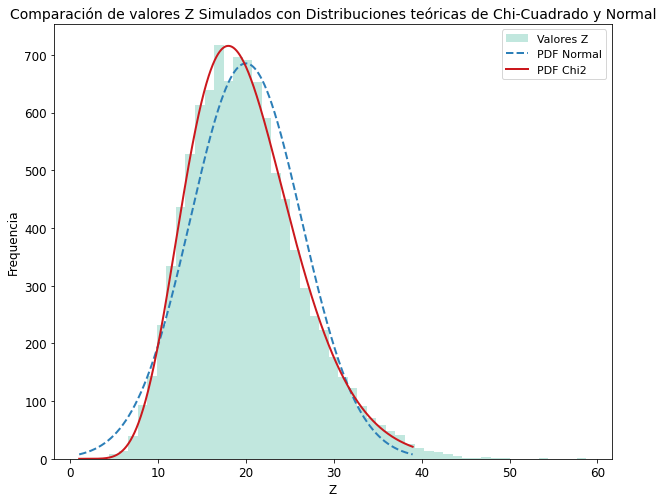

In [15]:
###  ----------  Plot de la distribucion teorica  junto con las simulaciones    ----------
# Histograma de frecuencia
fig, ax = plt.subplots(figsize=(10, 8)) 
#intervalos
n, bin_edges = np.histogram(Z,50)
bin_width = bin_edges[1] - bin_edges[0] 
scale_factor = bin_width * n_sim

#Plot
plt.hist(Z, bins= 50,alpha=0.6, color='#99d8c9', label="Valores Z")# density=True, 
plt.plot(x, normal * scale_factor, color='#2c7fb8', linewidth=2, linestyle='--', label=f"PDF Normal")
plt.plot(x, chi2 * scale_factor, color='#cb181d', linewidth=2, linestyle='-',label=f"PDF Chi2")

# Configurar el gráfico
plt.xlabel("Z",fontsize = 12)
plt.ylabel("Frequencia",fontsize = 12)
plt.title("Comparación de valores Z Simulados con Distribuciones teóricas de Chi-Cuadrado y Normal", fontsize = 14)
plt.legend(loc = "upper right", fontsize = 11)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


#### Conclusiones

A medida que el número de grados de libertad en una distribución chi-cuadrado aumenta, esta se aproxima a una distribución normal.

En este caso específicamente, con un número suficientemente alto de grados de libertad (20), la chi-cuadrado se asemeja a una normal, según el Teorema Central del Límite.

Por lo tanto, este histograma de una chi-cuadrado con 20 grados de libertad se parece a una distribución normal.